# Exploratory data analysis

### Module loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

#machine learning models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import tree, svm
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KernelDensity

from statsmodels.stats.proportion import proportion_confint

### Ideas

* Include a feature that captures if more people were in the cabin for instance

## Data loading

In [2]:
whole_data = pd.read_csv("raw_data/train.csv")

In [3]:
whole_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Create holdout set

In [4]:
data, holdout = train_test_split(whole_data, test_size=0.2, random_state = 42)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


## Feature analysis

First, lets look at the initial features

### Passenger ID

In [6]:
data.PassengerId.describe()

count    712.000000
mean     448.234551
std      256.731423
min        1.000000
25%      224.750000
50%      453.500000
75%      673.500000
max      891.000000
Name: PassengerId, dtype: float64

In [7]:
data.PassengerId = data.PassengerId.astype("category")

/home/adri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
# Check if all the passengerIds are unique
data["PassengerId"].value_counts().value_counts()

1    712
Name: PassengerId, dtype: int64


All passenger Ids are unique.

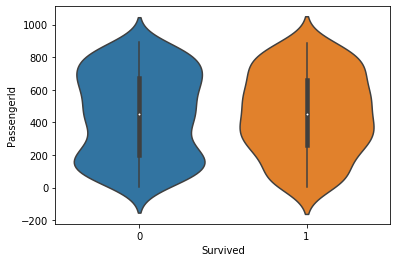

In [9]:
# Check if there is any relationship between survival and passenger IDs
sns.violinplot(x="Survived", y="PassengerId", data=data, orient="v")
plt.show()

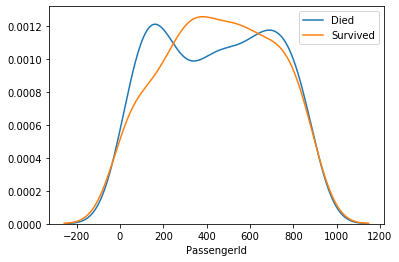

In [10]:
sns.distplot(data.PassengerId[data.Survived == 0], hist = False, label = "Died")
sns.distplot(data.PassengerId[data.Survived == 1], hist = False, label = "Survived")
plt.show()

In general it seems that there is no tendency relating passenger ID with survival

### Survived

In [11]:
data.Survived = data.Survived.astype("category")

In [12]:
data.Survived.value_counts(normalize=True)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

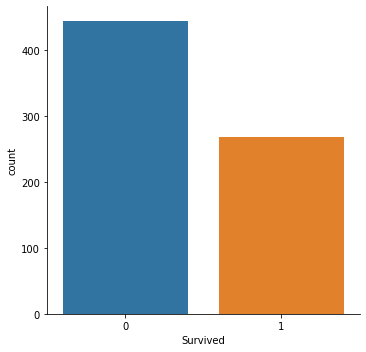

In [13]:
sns.catplot(x="Survived", kind="count", data=data)
plt.show()

Aproximately a 60% of the passengers died in the titanic and 40% survived. Probably the dataset is balanced enough to not include weights in the model.

### Pclass

In [14]:
data.Pclass = data.Pclass.astype("category")

In [15]:
data.Pclass.value_counts(normalize=True)

3    0.558989
1    0.228933
2    0.212079
Name: Pclass, dtype: float64

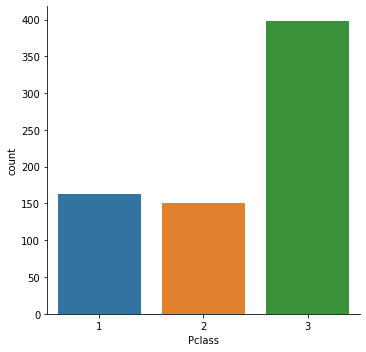

In [16]:
sns.catplot("Pclass", data = data, kind="count")

Passenger class is not balanced, 55% of the people where 3rd class, the rest is similarly balanced between 1st and 2nd class. 

In [17]:
data.groupby("Pclass").Survived.value_counts(normalize=True)

Pclass  Survived
1       1           0.607362
        0           0.392638
2       0           0.516556
        1           0.483444
3       0           0.758794
        1           0.241206
Name: Survived, dtype: float64

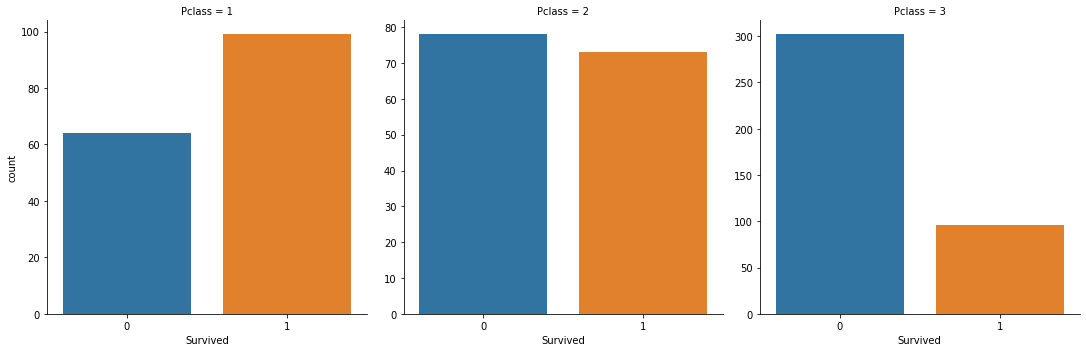

In [18]:
sns.catplot(col="Pclass", data = data, x="Survived", kind="count",sharey=False )

The frequency of survival is highly dependent on the passenger class. While in 3rd class people had 75% chances of dying, in 2nd it is a 52% and in 1st it is only a 37% chances. Therefore, The higher the class the more chances to survive.

### Name
Although there is some usefull information in the name field we will process this field later in the notebook. First, I will try to set a baseline using the simplest features in the initial dataset. 

### Sex

In [19]:
data.Sex = data.Sex.astype("category")

In [20]:
data.Sex.value_counts(normalize=True)

male      0.655899
female    0.344101
Name: Sex, dtype: float64

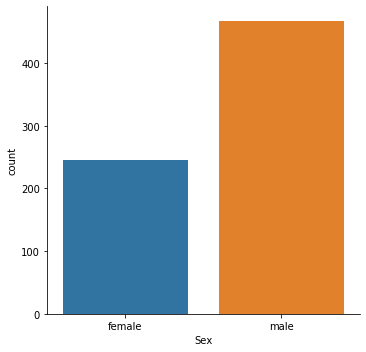

In [21]:
sns.catplot("Sex", data = data, kind="count")

Regarding Sex, 64% of the passengers where males.

In [22]:
data.groupby("Sex").Survived.value_counts(normalize=True)

Sex     Survived
female  1           0.738776
        0           0.261224
male    0           0.813704
        1           0.186296
Name: Survived, dtype: float64

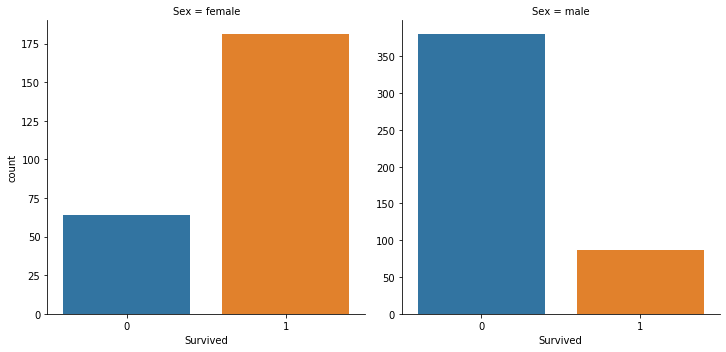

In [23]:
sns.catplot(col="Sex", data = data, x="Survived", kind="count", sharey=False )

Again, the survival rate is quite different between the two clases. A woman had 74% chances of surviving, while mens had 81% chances of perishing. It seems that class and sex are going to be quite important in predicting survival. Let's see if there is any kind of interaction between the two features. 

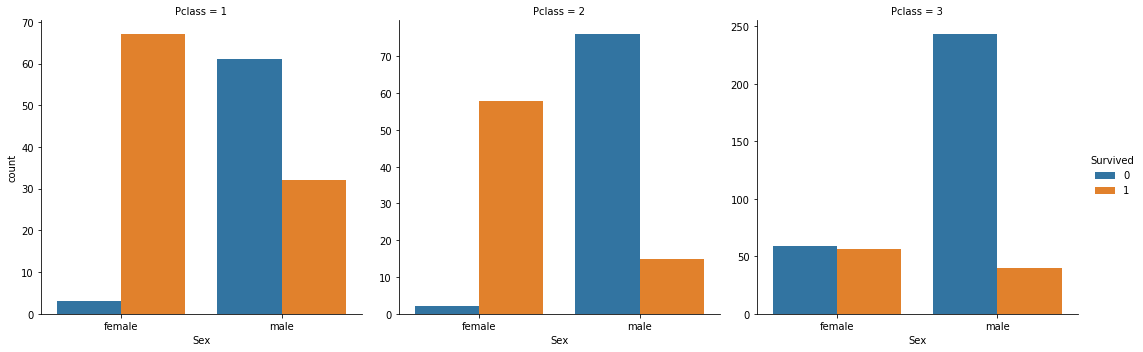

In [24]:
sns.catplot(x="Sex",col="Pclass", hue="Survived", kind="count", data = data, sharey=False)

It is evident that there is some interaction between the two variables. While being a woman of 1st or 2nd class  practically enures survival, womens of the 3rd class had the same chances of dying than surviving. Regarding men, survival rate is similar between males of 3rd and 2nd class. However, the forecast improves in 1st class men. 

### Age

In [25]:
data.Age.describe()

count    572.000000
mean      29.498846
std       14.500059
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

There are 177 (891-714) Passengers without age information. Mmaybe we can try to inputate the age based on closest neightbours. 

In [26]:
data.Age[data.Age < 1]

305    0.92
644    0.75
469    0.75
803    0.42
755    0.67
831    0.83
Name: Age, dtype: float64

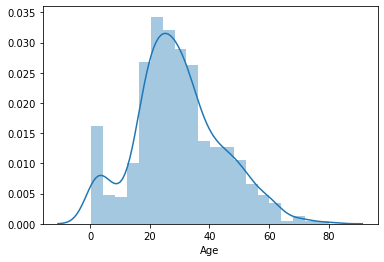

In [27]:
sns.distplot(data.Age.dropna())

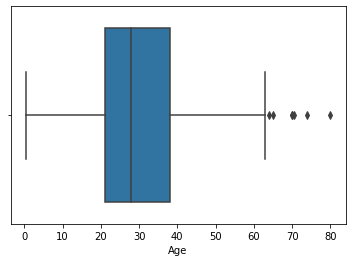

In [28]:
sns.boxplot("Age", data = data)

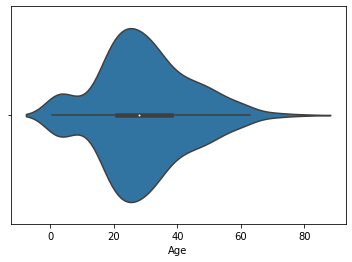

In [29]:
sns.violinplot("Age", data = data)

The distribution of age has a bell shape squed to the right. Also there is a small peak of frequency in babies that do not follow this bellshape. Some of the passengers fall out of the IQR, They are probably good candidates for outliers removal. 

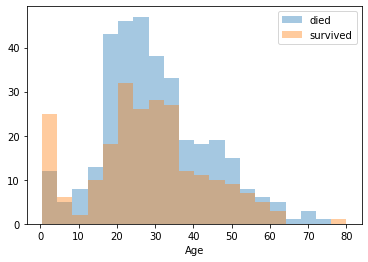

In [30]:
bins=np.histogram(data.Age.dropna(), bins=20, )[1] #get the bin edges

sns.distplot(data.Age[data.Survived == 0].dropna(), kde = False, label="died", bins=bins)
sns.distplot(data.Age[data.Survived == 1].dropna(), kde = False, label="survived", bins=bins)
plt.legend()

In [31]:
data.groupby(pd.cut(data.Age, bins)).Survived.value_counts()

Age               Survived
(0.42, 4.399]     1           24
                  0           12
(4.399, 8.378]    1            6
                  0            5
(8.378, 12.357]   0            8
                  1            2
(12.357, 16.336]  0           13
                  1           10
(16.336, 20.315]  0           43
                  1           18
(20.315, 24.294]  0           46
                  1           32
(24.294, 28.273]  0           47
                  1           26
(28.273, 32.252]  0           38
                  1           28
(32.252, 36.231]  0           33
                  1           27
(36.231, 40.21]   0           19
                  1           12
(40.21, 44.189]   0           18
                  1           11
(44.189, 48.168]  0           19
                  1           10
(48.168, 52.147]  0           15
                  1            9
(52.147, 56.126]  0            8
                  1            7
(56.126, 60.105]  0            6
                

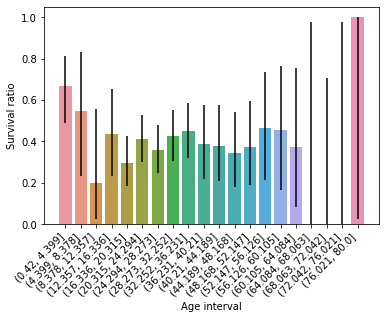

In [32]:
# Plot survival chances with confidence intervals
counts_by_age_bin = data.groupby(pd.cut(data.Age, bins)).Survived.value_counts()
counts_by_age_bin = counts_by_age_bin.unstack().fillna(0)

survival_ratio = []
n_list = []

for idx, (died, survived) in counts_by_age_bin.iterrows():
    n = died+survived
    survival_ratio.append(survived/(n))
    n_list.append(n)

p_ci =np.array( [proportion_confint(p*n, n, method="beta") for n, p  in zip(n_list, survival_ratio)]).transpose()

p_ci = abs(survival_ratio-p_ci)

intervals = list(map(str, counts_by_age_bin.index.values))

sns.barplot(intervals, survival_ratio)

plt.errorbar(intervals, survival_ratio, yerr = p_ci, fmt="none", ecolor="black")

plt.ylabel("Survival ratio")
plt.xlabel("Age interval")

plt.xticks(rotation=45, ha= "right")
plt.show()

From this plot we can see that kids from 0 to 4  years had the higher chaces to survive. This may be because gender did not influenced their evacuation priority. We see that people between 12 and 16 had surprinsingly low chances to survive. However, there is quite uncertainity with this probability -as can be seen by the size of the error bar- due to the low number of people in this range of age. Adults up to 64 years have a similar surviving probability. However uncertainity of this value increases with the age, as less people are found in the upper intervals. Finally, from 64 to 80 there is very litle data that makes it very difficult to draw any conclussions from the data. Maybe it would be a good thing to build the bins so all the buckets have the same number of people. 

In [33]:
from sklearn.preprocessing import KBinsDiscretizer

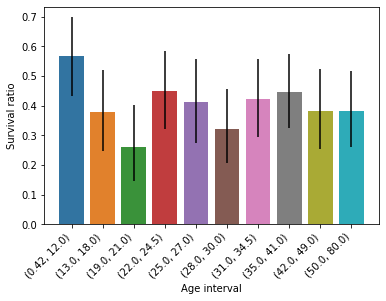

In [34]:
kbd = KBinsDiscretizer(n_bins = 10, encode="ordinal")
kbd.fit(data[["Age"]].dropna())

age_t = data[["Age", "Survived"]].dropna()

age_t["t_age"] = kbd.transform(age_t[["Age"]])

kbd_survival_count = age_t.groupby('t_age').Survived.value_counts().unstack()

survival_ratio = []
n_list = []

for idx, (died, survived) in kbd_survival_count.iterrows():
    n = died+survived
    survival_ratio.append(survived/(n))
    n_list.append(n)

p_ci =np.array( [proportion_confint(p*n, n, method="beta") for n, p  in zip(n_list, survival_ratio)]).transpose()

p_ci = abs(survival_ratio-p_ci)

intervals = [str(pair) for pair in zip( age_t.groupby("t_age").Age.min(), age_t.groupby("t_age").Age.max())]

sns.barplot(intervals, survival_ratio)

plt.errorbar(intervals, survival_ratio, yerr = p_ci, fmt="none", ecolor="black")

plt.ylabel("Survival ratio")
plt.xlabel("Age interval")

plt.xticks(rotation=45, ha= "right")
plt.show()

If I discretize the data so that there is the same number of people in each bin i.e. quantile k bins discretization,  the landscape changes alittle. Now we can trust the information of each bin in the same measure.I would say that there is a down tendency on the first three categories and then from this point on all people have more or less the same chances of survival. 

In [35]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

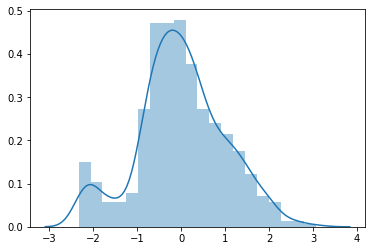

In [36]:
pt_age = PowerTransformer().fit_transform(X = data[["Age"]].dropna())
sns.distplot(pt_age)

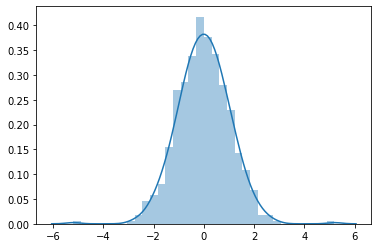

In [37]:
qt_age = QuantileTransformer(output_distribution="normal").fit_transform(X = data[["Age"]].dropna())
sns.distplot(qt_age)

In [38]:
# Transforming Age to fit a normal distribution
quantile_age_transformer = QuantileTransformer(output_distribution="normal")
quantile_age_transformer.fit(data[["Age"]])
data.Age = quantile_age_transformer.transform(data[["Age"]])

/home/adri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### SibSp

In [39]:
data.SibSp.describe()

count    712.000000
mean       0.553371
std        1.176404
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [40]:
data.SibSp.value_counts()

0    484
1    164
2     23
4     16
3     13
8      7
5      5
Name: SibSp, dtype: int64

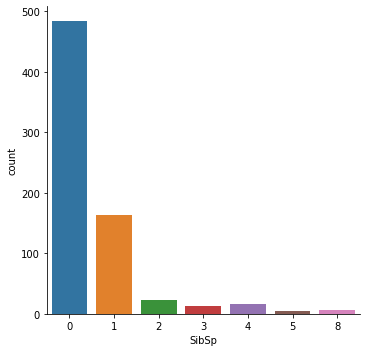

In [41]:
sns.catplot("SibSp", kind="count", data=data)

Almost all the people have either 0 or 1 sibling or spoutse on board. Only a few people had 2 or more. This low numbers could add some noice to our model. We could consider bucketizing categoires from 2 to 8 in a single one in order to capture common features between this group with some statistical confidence.

In [42]:
# Unify categories from 2 to 8
data.SibSp = data.SibSp.apply(lambda x: 2 if x not in [0, 1] else x)

In [43]:
data.groupby("SibSp")["Survived"].value_counts(normalize=True)

SibSp  Survived
0      0           0.654959
       1           0.345041
1      1           0.506098
       0           0.493902
2      0           0.718750
       1           0.281250
Name: Survived, dtype: float64

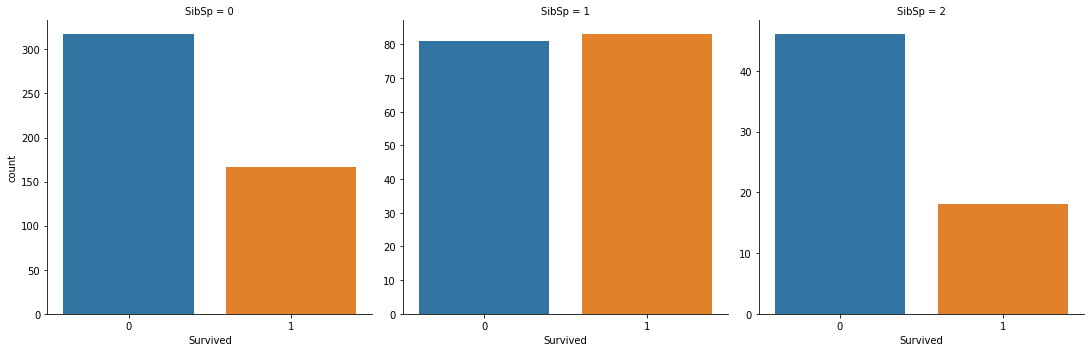

In [44]:
sns.catplot("Survived", kind="count",col="SibSp",col_wrap=4, sharey = False, data=data)

It seems that having 1 or 2 spouse and or siblings increse survival chances in comparison with other groups. All the people with 5 or more spouse+siblings died, however lets keep in mind the low N of this groups. for the other groups survival rates range from 16 in the case of 4% sibsp to 34% in the case of 0

### Parch

Parch correspond to the number of parents and or children that a passenger had onboard. I am going to treat is as a categorical variable

In [45]:
pd.concat([data.Parch.value_counts(), data.Parch.value_counts(
    normalize=True)*100], axis=1)

,Parch,Parch
0,541,75.983146
1,94,13.202247
2,67,9.410112
5,3,0.421348
4,3,0.421348
3,3,0.421348
6,1,0.140449


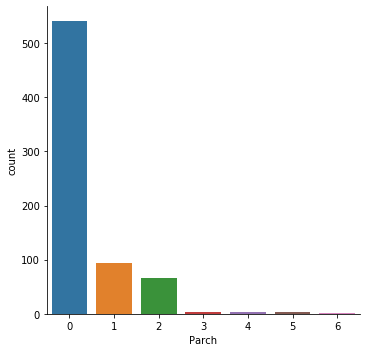

In [46]:
sns.catplot("Parch", kind="count", data=data)

Almost all the people, have from 0 to 2 first degree familiars in the titanic. From those, the biggest group is the people without any pared or offspring with a 76% of the passengers in this group. 

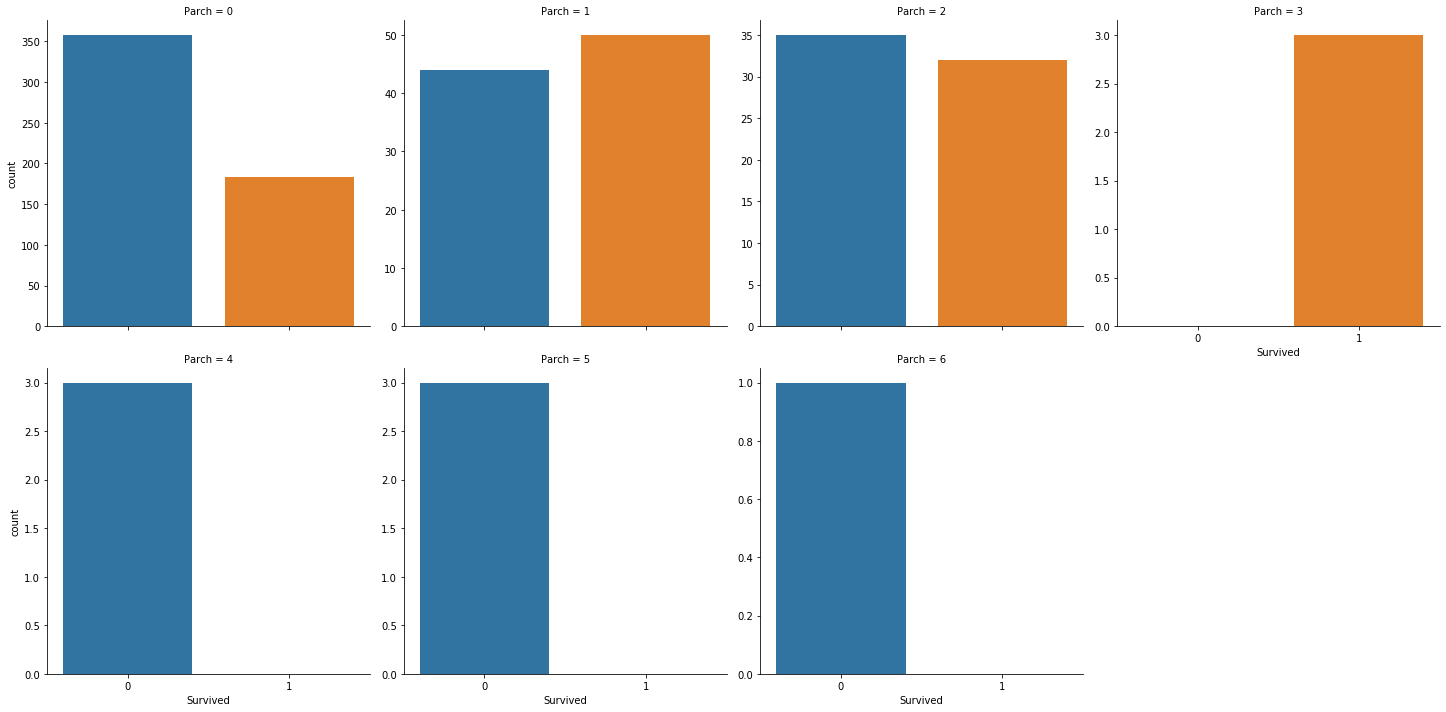

In [47]:
sns.catplot(col="Parch", kind="count", data=data, x="Survived", sharey=False, col_wrap=4)

keeping in mind that the frequncies for people with 3 or more parents or children are not trustable, due to low numbers, it seems that having 1 or two familiars of that kind is quite beneficial for survival. Probably it should be considered to remove the minoritary clases to reduce noise in the dataset. 

In [48]:
data.Parch = data.Parch.apply(lambda x: 2 if x not in [0, 1] else x)

### Ticket
For the same reason than the name, I will leave ticket for later

### Fare
Probably, Fare will be quite correlated to class. Therefore we may want to keep only one of the two features for modeling

In [49]:
data.Fare.describe()

count    712.000000
mean      32.586276
std       51.969529
min        0.000000
25%        7.925000
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

There is no Nan in this feature, however, the minimal value is 0. This can be due to represent not available data as 0 and for the members of the crew.

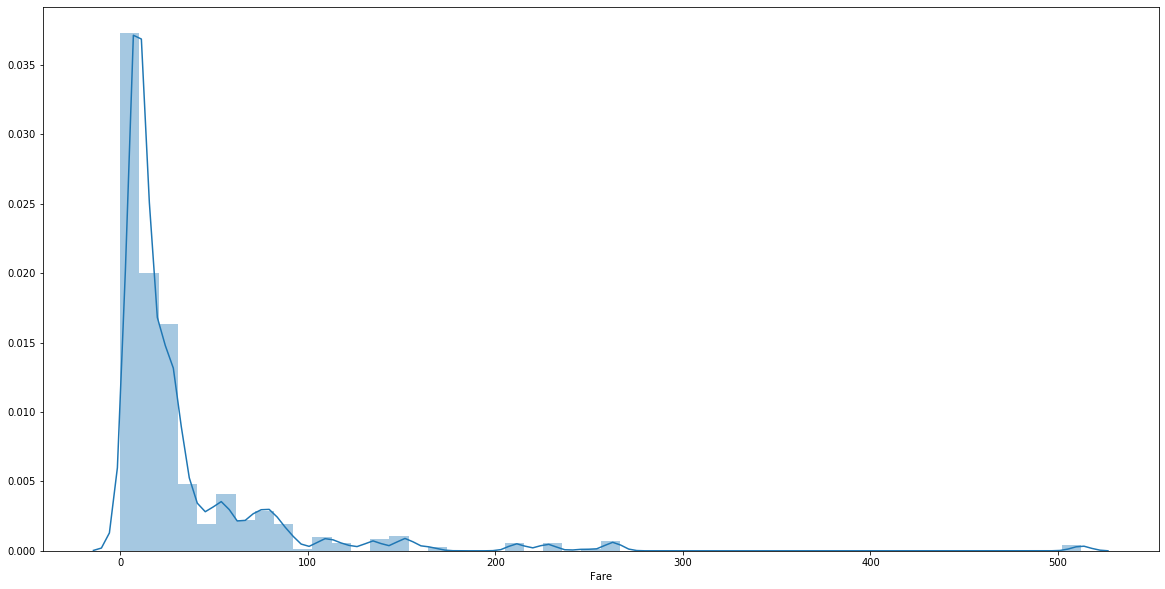

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data.Fare)

In [51]:
fare_quantile_transformer = QuantileTransformer(output_distribution="normal")
fare_quantile_transformer.fit(data[["Fare"]])
data.Fare = fare_quantile_transformer.transform(data[["Fare"]])

/home/adri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


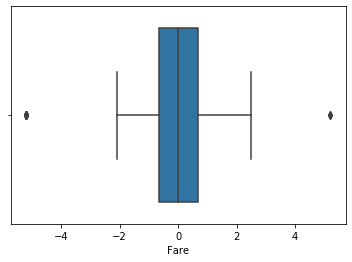

In [52]:
sns.boxplot("Fare", data = data)

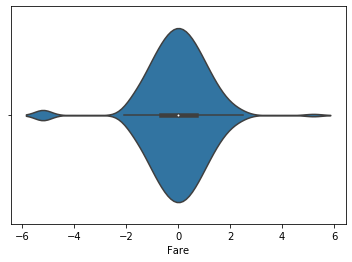

In [53]:
sns.violinplot("Fare", data = data)

It seems that the distribution is quite squed to the right. 75 % of the values are between 7 and 31. Lets see the correlation with pclass

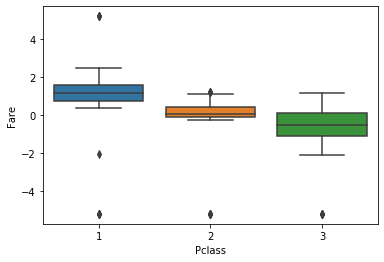

In [54]:
sns.boxplot(x = "Pclass", y = "Fare", data = data[data.Fare < 300])

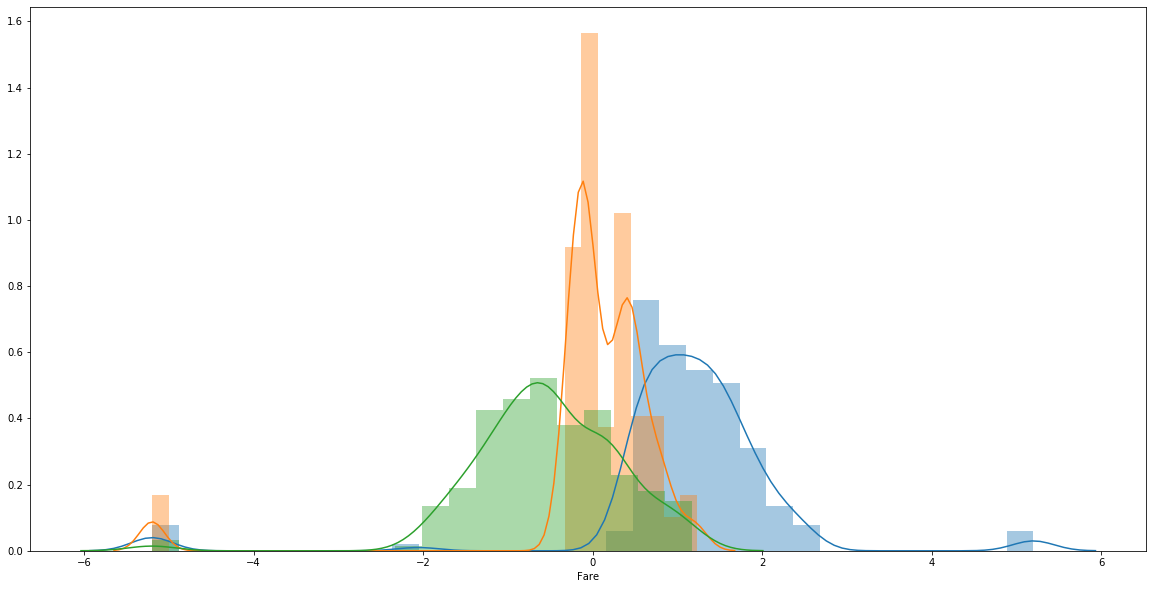

In [55]:
fig, ax = plt.subplots(figsize=(20,10))

sns.distplot(data[(data.Fare < 300) & (data.Pclass == 1)]["Fare"])
sns.distplot(data[(data.Fare < 300) & (data.Pclass == 2)]["Fare"])
sns.distplot(data[(data.Fare < 300) & (data.Pclass == 3)]["Fare"])

The distributions aer clearly different between the three groups. Surprisingly, it seems that there is quite overlaping of the clases. There is people from 3rd class that pays the same than people from 1st class. Let's look at its interaction with survival

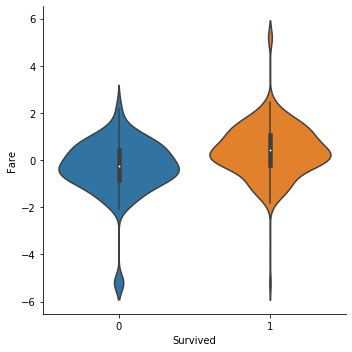

In [56]:
sns.catplot("Survived", "Fare", data=data[data.Fare < 300], kind="violin")

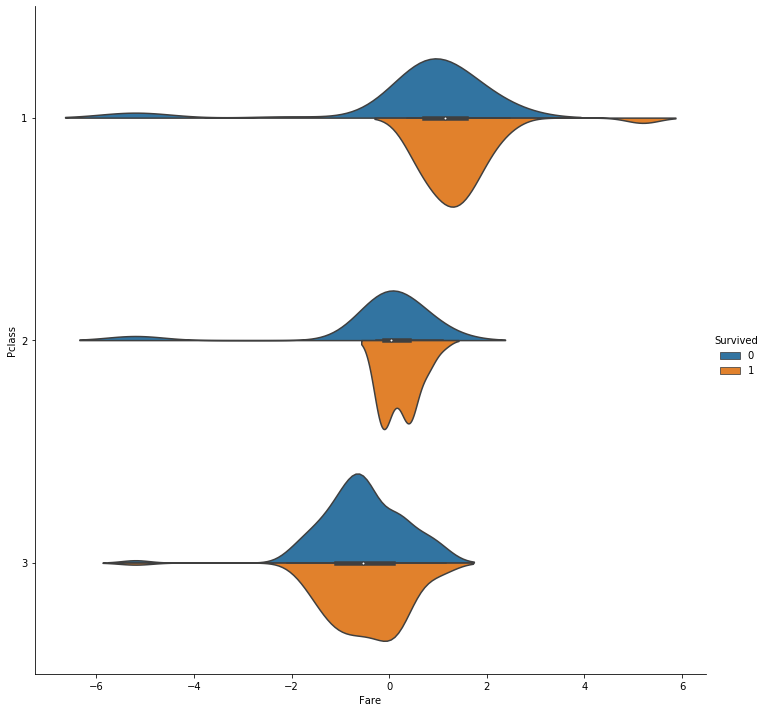

In [57]:

sns.catplot(x="Fare", y="Pclass",
               data=data[data.Fare < 300], hue="Survived", split=True, kind="violin", height=10, orient="h")

As for first class it seems that the fare have a moderate effect in the main bulk of data points. The distribution of survivors is slighly higher that non survivors. In the case of 2nd class, there is a second peak in the distribution of survivors that affects the survival rate for higher fares. Finaly for 1st class it does not seem to be any difference between the two distributions in the main bulk. 

There is a phenomenon in the second and third lcass in the top values apparently in booth cases, the top Fares were more likely to die, however, submaximal fares had more chances to survive.

It seems that Fare is not as informative as previous features analyzed

### Cabin

In [58]:
data.Cabin.describe()

count             159
unique            117
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [59]:
data.Cabin.isna().sum()

553

There are 147 different cabins, some of them are shared as the total number of not nan values are 204. The max frequency is 4 so the cabins with more capacity where thought for 4 people. There are 687 people without cabin. 

In [60]:
data.Cabin[(data.Cabin.notna()) | (data.Cabin == 0)].values

array(['C124', 'B58 B60', 'B38', 'C52', 'C93', 'C45', 'B20', 'B96 B98',
       'C82', 'C78', 'C106', 'C22 C26', 'B57 B59 B63 B66', 'B28', 'C104',
       'F2', 'D11', 'C86', 'E38', 'C52', 'A34', 'C91', 'C68', 'F2',
       'F G73', 'E46', 'C92', 'E50', 'A32', 'G6', 'C128', 'E10', 'E44',
       'B28', 'B41', 'B18', 'D35', 'E31', 'C2', 'C50', 'C103', 'B18',
       'B3', 'A10', 'C49', 'C90', 'B77', 'C123', 'D', 'D36', 'E33', 'F2',
       'B5', 'A19', 'B37', 'F G73', 'E58', 'C124', 'C23 C25 C27', 'F33',
       'C7', 'E67', 'E8', 'B22', 'B35', 'C125', 'C65', 'C54', 'B80',
       'B94', 'C23 C25 C27', 'D26', 'E121', 'E24', 'C78', 'D45', 'B101',
       'B51 B53 B55', 'D17', 'D46', 'E17', 'B4', 'C46', 'A23', 'F4', 'C2',
       'C47', 'E101', 'C111', 'E101', 'C101', 'E67', 'C22 C26', 'B82 B84',
       'C70', 'C32', 'E101', 'B77', 'C125', 'F4', 'C23 C25 C27', 'B5',
       'B35', 'B102', 'D20', 'B71', 'B51 B53 B55', 'E121', 'A36', 'D9',
       'B50', 'C93', 'C65', 'D33', 'A16', 'E44', 'C68', 'B22',

Looking at the values, it seems that cabins are named with a letter and an optional number. Also, there is people with more than one room in their record. For the sake of simplicity, In this first round of analysis I will take Cabin as a boolean feature, being 0 if nan and 1 otherwise. 

In [61]:
data["boolean_cabin"] = data.Cabin.notna().astype(int)

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
data.boolean_cabin = data.boolean_cabin.astype("category")

/home/adri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [63]:
data.groupby("boolean_cabin")["Survived"].value_counts(normalize=True)

boolean_cabin  Survived
0              0           0.701627
               1           0.298373
1              1           0.647799
               0           0.352201
Name: Survived, dtype: float64

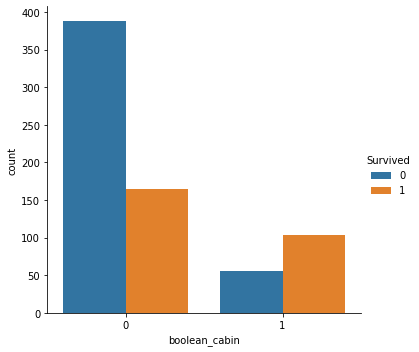

In [64]:
sns.catplot(x="boolean_cabin", hue="Survived", kind = "count", data = data)

Only taking into account the boolean cabin there is already a quite important difference in survival ratio. Not having a cavinet results in a 70% chances of diying, while having one increases your survival chances to 66%. Like in the case of the fare, Probably there is a high correlation with the passenger class.

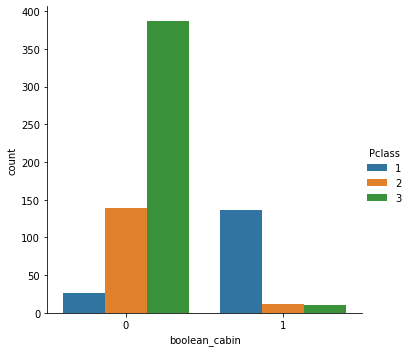

In [65]:
sns.catplot("boolean_cabin", kind="count", data=data, hue="Pclass")

Almost all the people in cavins are from 3rd class. Surprisingly there are people from all classes in the two groups. on the other hand almost all the people from second and third class does not have a cabin. Closer inspection must be done to uncommon cases to discard possible outlayers. 

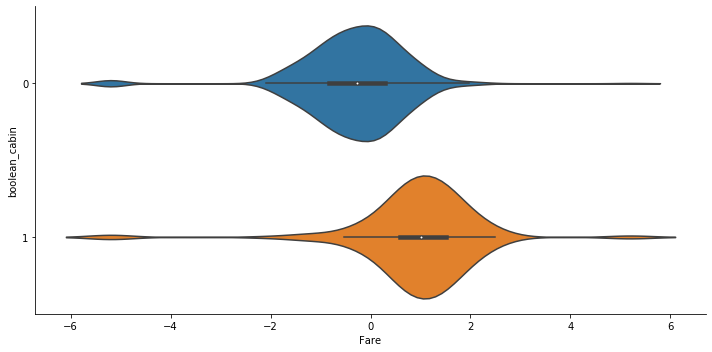

In [66]:
sns.catplot( "Fare","boolean_cabin", kind="violin", data=data, orient="h",aspect=2)

As espected, there is a difference in the fare of people with and without cabin

### Embarked

In [67]:
data.Embarked = data.Embarked.astype("category")

In [68]:
data.Embarked.describe()

count     710
unique      3
top         S
freq      525
Name: Embarked, dtype: object

In [69]:
pd.concat([data.Embarked.value_counts(), data.Embarked.value_counts(
    normalize=True)*100], axis=1)

,Embarked,Embarked
S,525,73.943662
C,125,17.605634
Q,60,8.450704


In [70]:
data.Embarked.isna().sum()

2

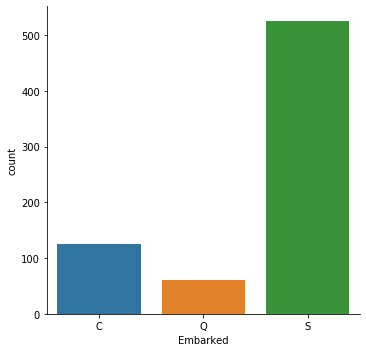

In [71]:
sns.catplot("Embarked", kind="count", data=data)

We see that Embarked is unevenly distributed, 72% of the whole people embarked in "S". There are two Nans in the feature, we could remove them or imput the value based on the rest of the features. 

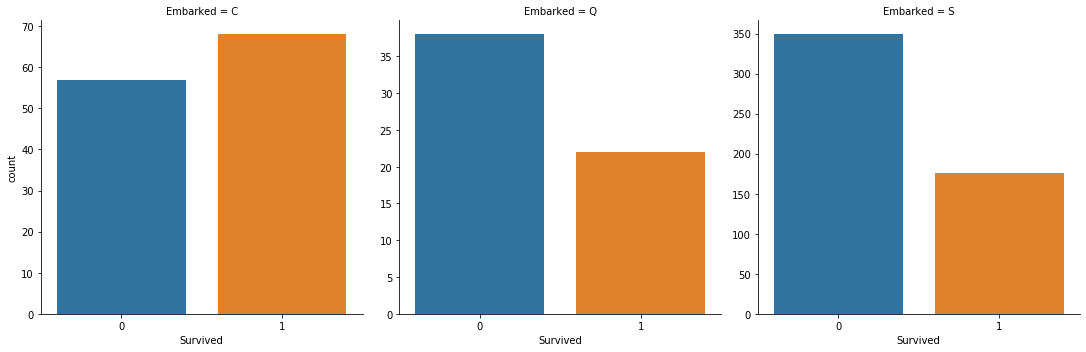

In [72]:
sns.catplot(col="Embarked", kind="count", data=data, x="Survived", sharey=False)

The survival rate is considerably affected by the embarking logation. Embarking in C makes it more probable to survive. on the contrary embarking in  in q or s have higher and similar probabliity to die. 

## Preparing the data

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
X = data.drop(["Cabin", "PassengerId", "Name", "Ticket"], axis=1).dropna()

y = X[["Survived"]]
X = X.drop("Survived", axis=1)

In [75]:
X = pd.get_dummies(X)

In [76]:
# Scaling dataframe
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [77]:
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,boolean_cabin_0,boolean_cabin_1
0,0.602756,0.0,0.0,0.557704,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.457650,0.0,0.0,0.489968,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.528020,0.0,0.0,0.435968,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.484490,0.5,0.0,0.415644,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.357409,1.0,1.0,0.567848,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [78]:
y.head()

,Survived
331,0
733,0
382,0
704,0
813,0


## Data imputation

In [79]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,boolean_cabin
331,332,0,1,"Partner, Mr. Austen",male,1.068522,0,0,113043,0.600041,C124,S,1
733,734,0,2,"Berriman, Mr. William John",male,-0.440383,0,0,28425,-0.104318,NaN,S,0
382,383,0,3,"Tikkanen, Mr. Juho",male,0.291367,0,0,STON/O 2. 3101293,-0.665852,NaN,S,0
704,705,0,3,"Hansen, Mr. Henrik Juul",male,-0.161281,1,0,350025,-0.877196,NaN,S,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,-1.482760,2,2,347082,0.705530,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,-0.353487,0,1,PC 17558,2.283460,B58 B60,C,1
536,537,0,1,"Butt, Major. Archibald Willingham",male,1.023003,0,0,113050,0.503497,B38,S,1
361,362,0,2,"del Carlo, Mr. Sebastiano",male,0.075345,1,0,SC/PARIS 2167,0.561327,NaN,C,0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,-0.731515,NaN,S,0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,0.774833,C52,S,1


## Baseline model

In [80]:
def cross_fold_validation(clf, verbose=0):

    kf = KFold(n_splits=5, shuffle=True)

    f1_list = []
    cm_list = []

    error_df = pd.DataFrame()

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = clf.fit(X_train, y_train)

        pred = clf.predict(X_test)

        f1 = f1_score(y_test, pred)

        f1_list.append(f1)

        cm = confusion_matrix(y_test, pred)
        cm_list.append(cm)

        test_and_preds = pd.concat([X_test.reset_index(drop=True),
                                    y_test.reset_index(drop=True),
                                    pd.Series(pred, name="pred")],
                                   axis=1)
        test_and_preds = test_and_preds[test_and_preds.Survived != test_and_preds.pred].drop([
                                                                                             "Survived", "pred"], axis="columns")

        error_df = pd.concat([error_df, test_and_preds])

    f1_mean = np.mean(f1_list)
    f1_sd = np.std(f1_list)
    if verbose == 1:
        print(f"result: {f1_mean:.3} +- {f1_sd:.3}")
        print(sum(cm_list))

    return clf, f1_list, cm_list, error_df

In [81]:
def fit_models(model_dict):

    f1_df = pd.DataFrame(columns=["value", "model"])

    error_df_dict = {}

    for name, model in model_dict.items():

        error_df_dict[name] = pd.DataFrame()

        for i in range(10):
            _, f1_list, cm_list, error_df = cross_fold_validation(model)

            f1_df = pd.concat([f1_df, pd.DataFrame({"value":f1_list, "model": name})])

            error_df_dict[name] = pd.concat([error_df_dict[name], error_df])
    
    return f1_df, error_df_dict

In [82]:
# testing several models
model_dict = {"naive_bayes": GaussianNB(),
              "logistic_regression": LogisticRegression(solver="lbfgs", max_iter=300),
              "decision_tree": tree.DecisionTreeClassifier(max_depth=4),
              "svm": svm.SVC(gamma='scale'),
              "random_forest": RandomForestClassifier(n_estimators=100),
              "neural_net": MLPClassifier(max_iter = 5000)}

f1_df, error_df_dict = fit_models(model_dict)

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A 

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A 

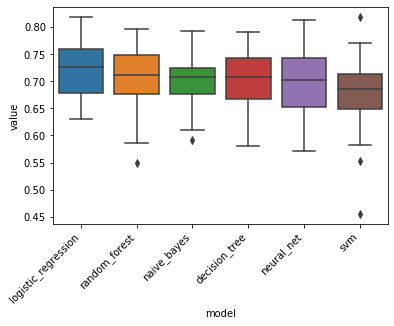

In [83]:
model_order = f1_df.groupby("model").mean().sort_values("value", ascending=False).index
sns.boxplot(y="value", x = "model", data = f1_df, order=model_order)
plt.xticks(rotation=45, ha="right")
plt.show()

After trying several models with a 5-fold cross validation, no big difference is spotted between the models. In general, they get a f1 score around 0.7-0.75. The model with the best mean is the logistic regression. However, I will not discard any model at this timepoint. 

### Error analysis

In [84]:
def bucketize_df(df, n_bins = None, template = None):
    df = df.copy()
    for col in df:

        if len(df[col].unique()) > 2:
            if template is not None:
                bins = template[col].cat.categories
            else: 
                bins = np.linspace(df[col].min(), df[col].max(), n_bins)
                # correcting for the precision trim of pd.cut
                bins[-1] += 1e-3
            df[col] = pd.cut(df[col], bins)

            
    return df

In [85]:
from itertools import combinations

In [86]:
def get_combinator_df(df, degree=2):

    combined_serie_list = []
    
    # Avoid combinations of columns with the same prefix
    for col_set in combinations(df.columns, r = degree):
        
        # concatenating strings
        sum_col = df[list(col_set)].all(axis = 1).astype(int)
        
        if not sum_col.any():
            continue
            
        sum_col.name = "_".join(col_set)
        
        combined_serie_list.append(sum_col)
        
    combinatorial_df = pd.concat(combined_serie_list, axis = 1)
    
    combinatorial_df.index = df.index

    return combinatorial_df

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
def analyze_errors(error_df_dict, degree = 1, sigma_threshold = -np.inf):
    
    sigma_df = pd.DataFrame({'feature':[],
                             'sigma':[],
                             'model':[]})
    for model_name, error_df in error_df_dict.items():
        
        bucketized_X = bucketize_df(X, 5)
        error_df = bucketize_df(error_df, template = bucketized_X)
        
        bucketized_X = pd.get_dummies(bucketized_X)
        error_df = pd.get_dummies(error_df)
        
        if degree >1:
            bucketized_X = get_combinator_df(bucketized_X, degree)
            error_df = get_combinator_df(error_df, degree)

            features_sigma = []
        
        for col in error_df:
            if len(error_df[col].unique()) == 2:

                err_dist = error_df[col].value_counts()
                X_dist = bucketized_X[col].value_counts(normalize=True)

                n = len(error_df)
                p = X_dist[1]
                q = 1-p

                observed = err_dist[1]
                expected = n*p
                std = np.sqrt(n*p*q)

                sigma = (observed-expected)/std

                features_sigma.append([col, sigma, model_name])

        sigma_df = pd.concat([sigma_df, pd.DataFrame(features_sigma, columns = sigma_df.columns)])    
    
    feature_grouped_df = sigma_df.groupby("feature").median()
    
    feature_grouped_df = feature_grouped_df[feature_grouped_df.sigma > sigma_threshold]

    sorted_features = feature_grouped_df.sort_values("sigma", ascending = False).index
    
    filtered_sigma = sigma_df[sigma_df.feature.apply(lambda x: x in sorted_features)]
    
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x = "feature", y="sigma", data = filtered_sigma, order = sorted_features)
    plt.xticks(rotation=45,ha="right")
    plt.plot()

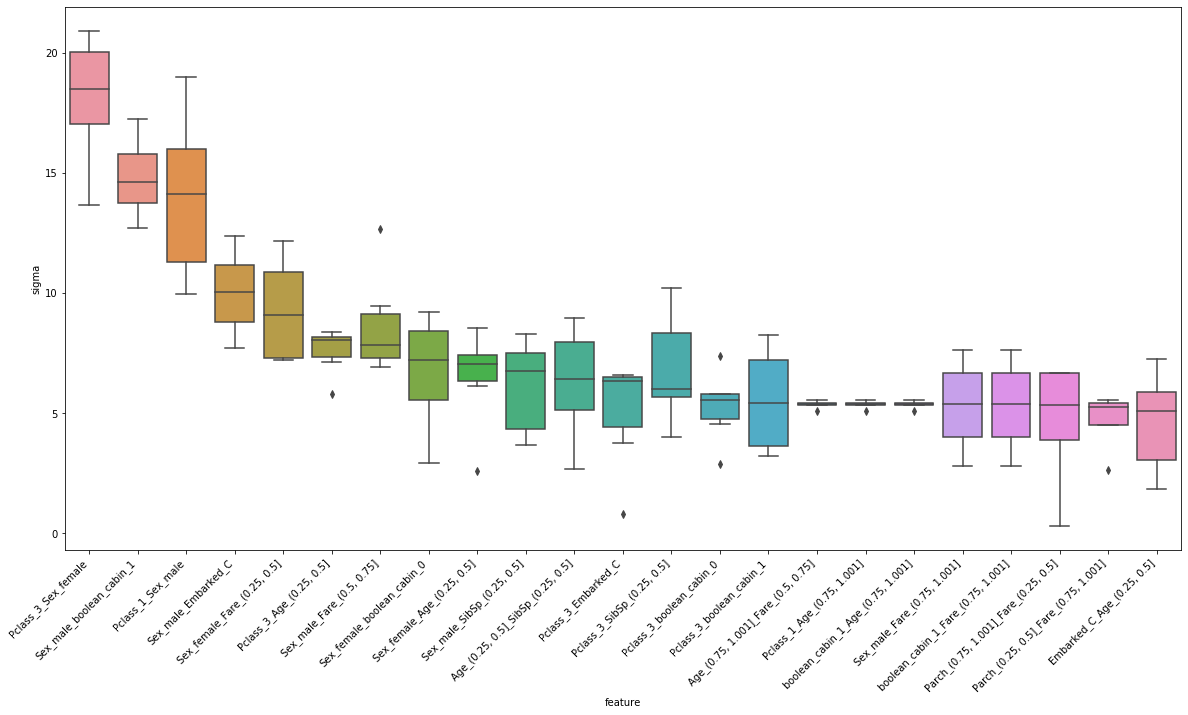

In [89]:
analyze_errors(error_df_dict, 2, 5)

In the error analysis, we see that the groups where we are failing more are the passengers with cabin and 3rd and 1st class. Lets try to increase the information about these groups. There is an obvious way to improve the data there is about the cabin, as I simplified it as a boolean variable. Also, the name and the ticket have not been used in this preliminar exploration. I will look at them in more depth in the next round. 

## Name, ticket and Cabin deeper analysis

### Name

The name column is a complex field. There we can find the Familiy name of the passenger, their title, followed by the given name. 

For some women, we find the a male name where there is usually the name of the passenger, and then a woman name between brackets at the end of the string. Women with this characteristic not allways have a number different from 0 in the SibSp field.

In some cases, the given name is between brackets, and in some others there are names or nicknames of the passenger. 

Probably, the most usefull information in this field are the following features:
* Title
* for women, the presence of the full name between the brackets.
* Also for women the fact the the man in the name field is in the passenger list
* for men, the presence in the dataset of a woman with its name in the name field

Because the last three points depend on other records I will try to use them later, if satisfactory performance is not reached. 

In [90]:
# Extracting title
data["title"] = data.Name.apply(lambda x: re.findall("(\w*)\.", x)[0]).astype("category")

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


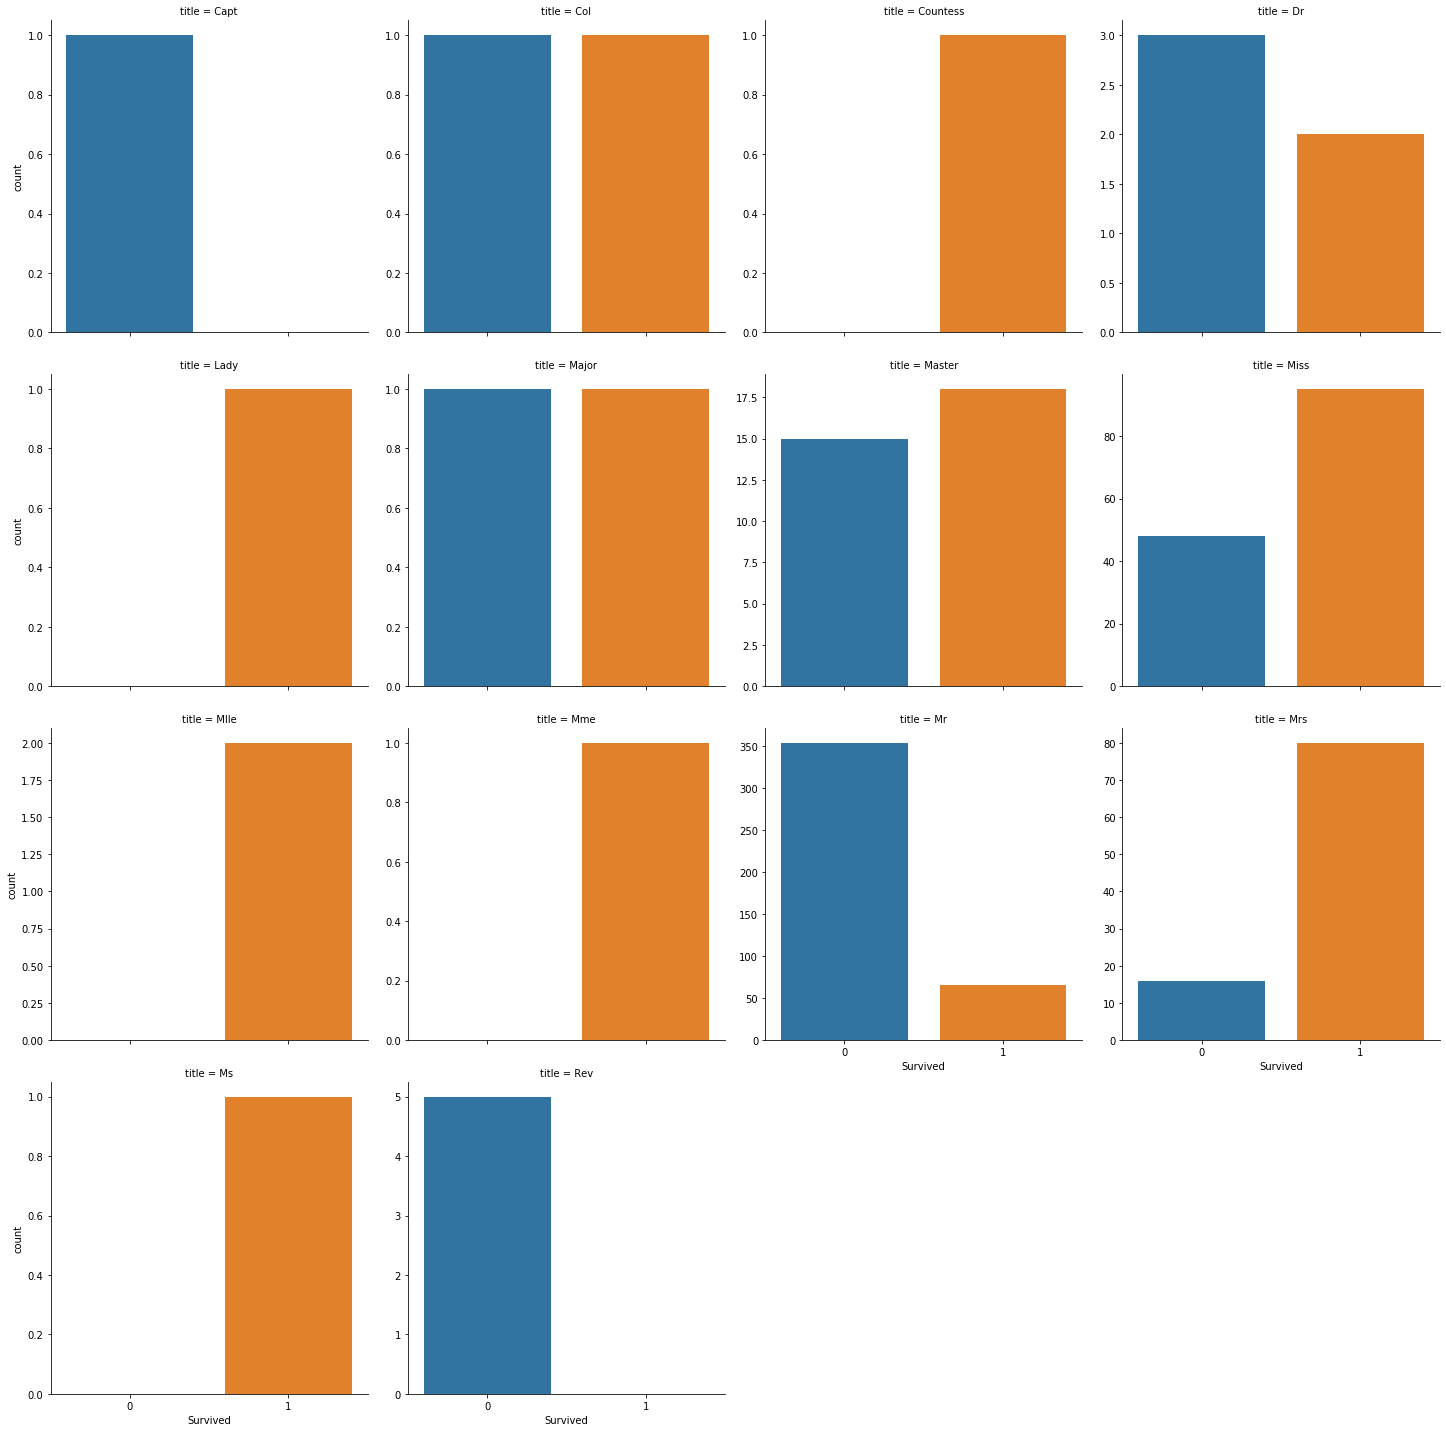

In [91]:
sns.catplot(col = "title", x="Survived", kind="count", data=data, sharey=False, col_wrap=4)

Looking at the frequencies the most of the clases only appear a few times in the whole dataset, therefore they are of little use. 

In order to have an statistically reliable labels I am going to compute the confidence interval of the observed probability of survival en each categroy. 

In [92]:
grouped_by_title = data.groupby("title")["Survived"].value_counts()
grouped_by_title.name = "count"
grouped_by_title = grouped_by_title.reset_index("Survived")
grouped_by_title= grouped_by_title.pivot(columns = "Survived").fillna(0).astype(int)
grouped_by_title["total"] = grouped_by_title.sum(axis=1)
grouped_by_title.columns = ["death", "survived", "total"]

ci_df = pd.DataFrame(proportion_confint(
    grouped_by_title["survived"], grouped_by_title["total"], method="agresti_coull")).transpose()
ci_df.columns = ["lower_ci", 'upper_ci']
binom_ci_df = pd.concat([grouped_by_title, ci_df], axis = 1)

binom_ci_df["significative"] = ((binom_ci_df['lower_ci'] > 0.5) | (binom_ci_df['upper_ci'] < 0.5)).astype(int)

In [93]:
binom_ci_df

,death,survived,total,lower_ci,upper_ci,significative
title,,,,,,
Capt,1,0,1,0.000000,0.832501,0
Col,1,1,2,0.094531,0.905469,0
Countess,0,1,1,0.167499,1.000000,0
Dr,3,2,5,0.115987,0.770910,0
Lady,0,1,1,0.167499,1.000000,0
Major,1,1,2,0.094531,0.905469,0
Master,15,18,33,0.379797,0.701633,0
Miss,48,95,143,0.583420,0.736653,1
Mlle,0,2,2,0.290227,1.000000,0


I will group as one single title all those titles that don't have a frequency statistically different than 0.5

In [94]:
levels_to_merge = binom_ci_df.index[binom_ci_df.significative == 0]

In [95]:
data.title = data.title.apply(lambda x: 'other' if x in levels_to_merge else x).astype('category')

/home/adri/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


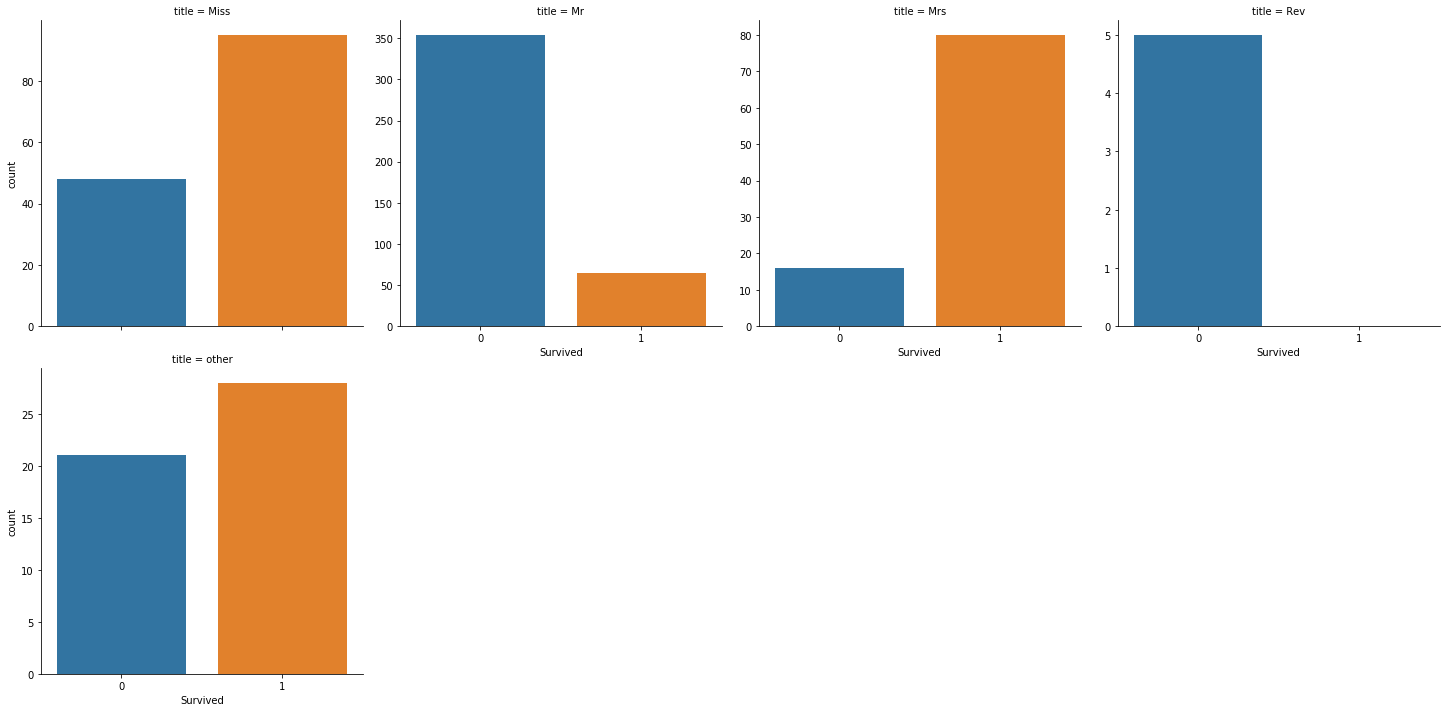

In [96]:
sns.catplot(col = "title", x="Survived", kind="count", data=data, sharey=False, col_wrap=4)

Probably, this feature is not giving us a lot of information about men, given that almost all of them are labelled as Mr. There is a relatively big class, Masters, that are men and have a different survival probability that the main bulk of men. Although reverends have a null probability of surviving, according to our dataset, their low number probably will not allow us to generalize. 

In the case of women, there are two levels, miss and Mrs. The survival probability between them is a bit different. Therefore, it can add information about this group. 

### Cabin

Looking at the people with more than one cabin we can see that cabins have close numberings and the same letters in all the cases. A quick search in the internet reveaks that the letter of the cabin stands for the deck of the ship, being A in the top deck and G in the lower deck. On the other hand, number cabin are more complicated feature. On one hand, even and odd cabins were distributed on each half of the boat, however, there is not always a perfect relation about the number and the longitudinal position of the cabin in the boat. Furthermore, the same number in different decks may correspond to different locations in the boat. 

In order to differentiate even and odd numbers I am going to apply a transformation to this feature. To do so, I am going to change the sign of even numbers so that the model is able to learn survival paterns independiently from each half of the boat. 

In [97]:
parsed_cabins = data.Cabin.fillna("").apply(lambda x: re.findall("(\w)(\d+)", x))

In [98]:
deck = []
cabin_number = []
for cabin_list in parsed_cabins:
    
    deck_list = set([cabin[0] for cabin in cabin_list])
    if deck_list:
        deck.append(list(deck_list)[0])
    else:
        deck.append("None")
        
    number_list = [int(cabin[1]) for cabin in cabin_list]
    
    if number_list:
        cabin_number.append(np.mean(number_list))
    else:
        cabin_number.append(0)
    
    

In [99]:
data = pd.concat([data, pd.DataFrame({"deck": deck,
                               "cabin_number": cabin_number},
                              index=data.index)], axis=1).drop(["Cabin", "boolean_cabin"], axis = 1)

In [100]:
data.deck = data.deck.astype("category")

In [101]:
data.cabin_number = data.cabin_number.apply(lambda x: -x if x%2 == 0 else x).astype(int)

Let's look at the distribution of deck and cabin_number

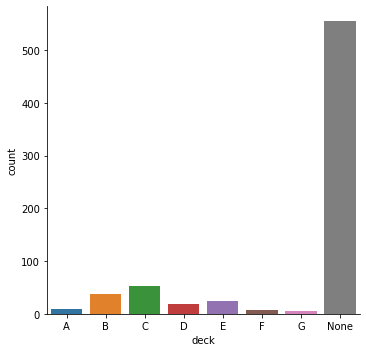

In [102]:
sns.catplot("deck", data = data, kind="count")

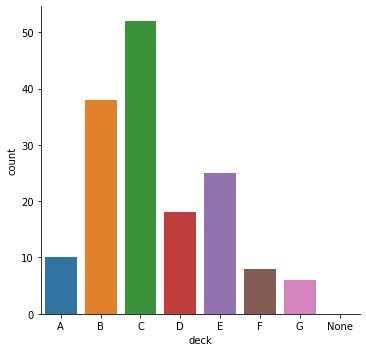

In [103]:
sns.catplot("deck", data = data[data.deck != "None"], kind="count")

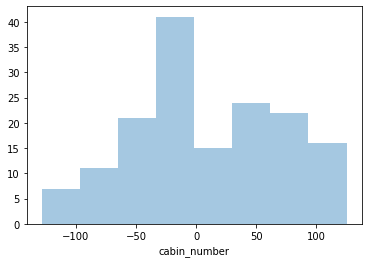

In [104]:
sns.distplot(data.cabin_number[data.cabin_number != 0], kde=False)

Let's see how the new variables correlate with the outcome

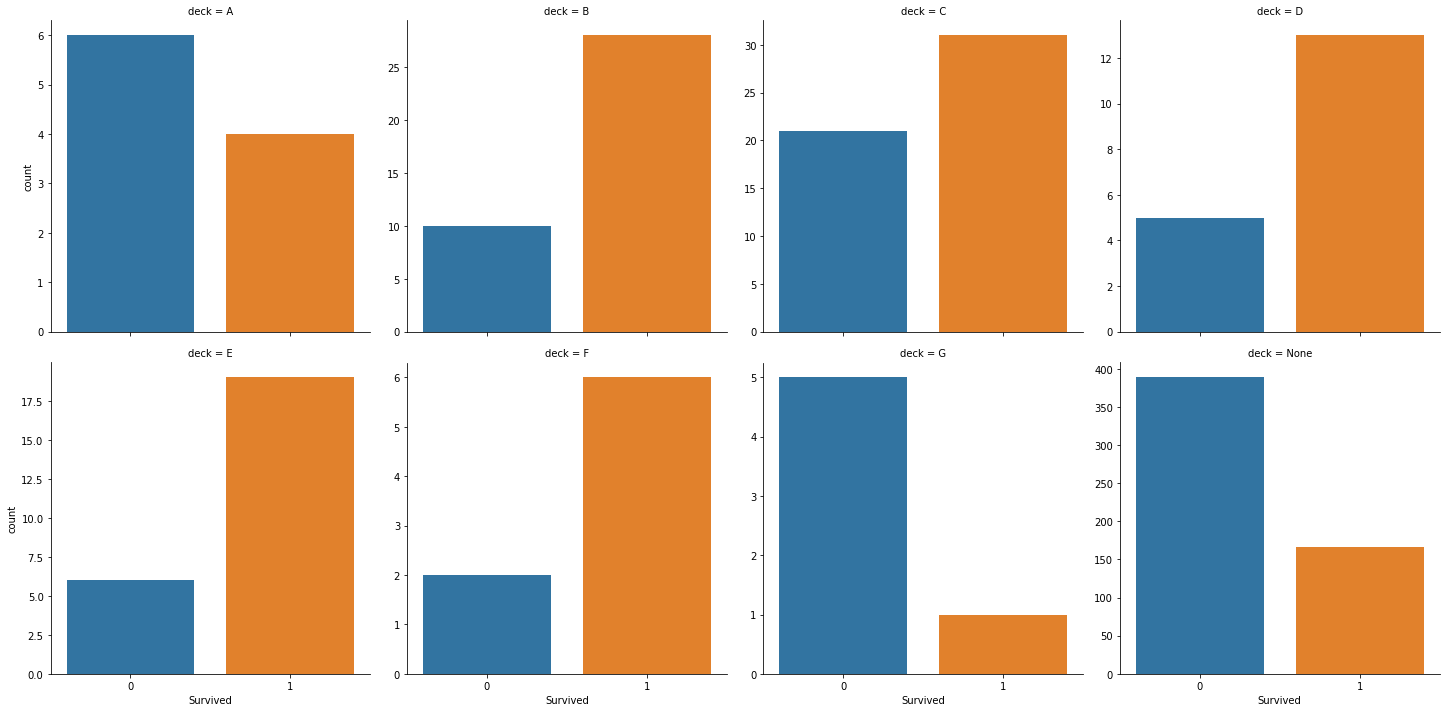

In [105]:
sns.catplot(x="Survived", kind="count", data=data, col="deck", col_wrap=4, sharey=False)

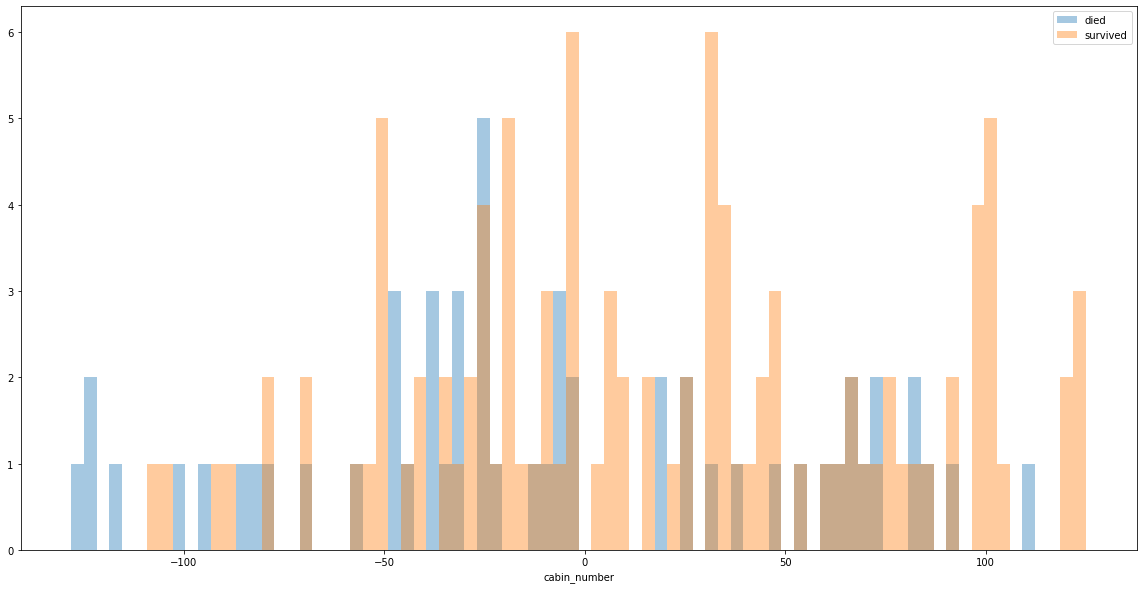

In [107]:
bins=np.histogram(data.cabin_number, bins=80)[1] #get the bin edges
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data.cabin_number[data.cabin_number != 0][data.Survived == 0], kde = False, label="died", bins=bins)
sns.distplot(data.cabin_number[data.cabin_number != 0][data.Survived == 1], kde = False, label="survived", bins=bins)
plt.legend()

In [108]:
data.deck.cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'None'], dtype='object')

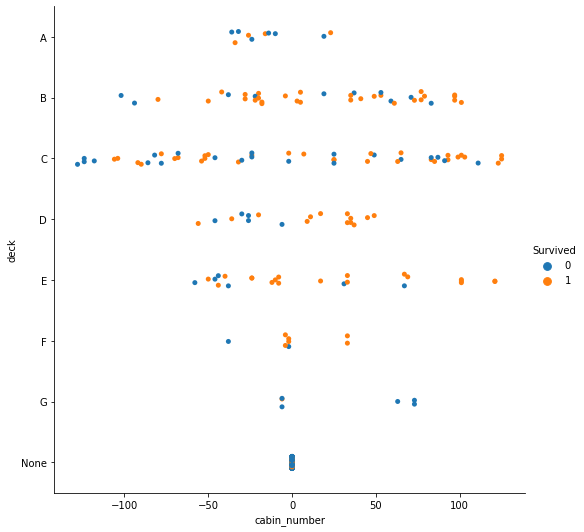

In [109]:
sns.catplot(x="cabin_number", y="deck", hue="Survived", data = data, height=7.5)

### Ticket

In [110]:
# Extracting ticket number from ticket
ticket_number = data.Ticket.apply(lambda x: re.findall("(\d+)$", x))
ticket_number = ticket_number.apply(lambda x: int(x[0]) if x else 0).astype(int)

In [111]:
# Extracting prefix from ticket
ticket_prefix =  data.Ticket.apply(lambda x: re.findall("(.*)\s+.+$", x))
ticket_prefix = ticket_prefix.apply(lambda x: x[0] if x else "None").astype("category")

In [112]:
ticket_df = pd.DataFrame({'number': ticket_number, 
                        'prefix': ticket_prefix, 
                        'survived': data.Survived})

In [113]:
ticket_df.head()

,number,prefix,survived
331,113043,None,0
733,28425,None,0
382,3101293,STON/O 2.,0
704,350025,None,0
813,347082,None,0


#### Ticket number

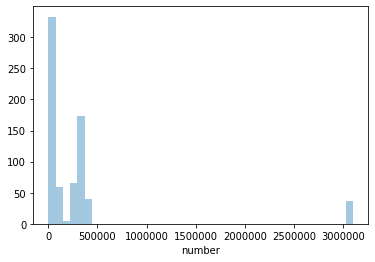

In [114]:
sns.distplot(ticket_df['number'], kde = False)

The distribution of ticket numbers is quite sparse, therefore I think it will be better to work with the logarithm of the ticket number. 

In [115]:
ticket_df['log'] = ticket_df.number.apply(lambda x: np.log(x) if x else 0)

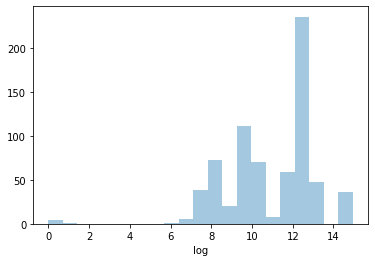

In [116]:
sns.distplot(ticket_df['log'], kde = False)

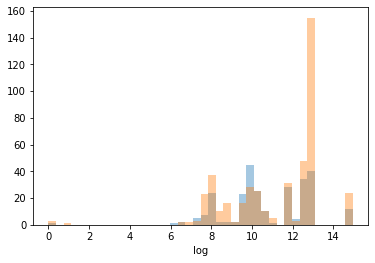

In [117]:
bins=np.histogram(ticket_df['log'], bins=40)[1] #get the bin edges

sns.distplot(ticket_df['log'][data.Survived == 1], kde=False, bins=bins)
sns.distplot(ticket_df['log'][data.Survived == 0], kde=False, bins=bins)
plt.show()

One option is that I am wrongly treating the ticket number as a numeric variable. I will try to see if there is any kind of correlation treating the number as a categorical variable. In order to do that, I will split each number into digits and find correlation between digits and the survival outcome. 

After that I will try to train a model using the digits independiently

In [118]:
max_len = max([len(str(num) )for num in ticket_df.number])

In [119]:
ticket_digits = np.array([[int(digit) for digit in f'{num:<07d}'] for num in ticket_df.number])

In [120]:
clf = LogisticRegression(solver="lbfgs", max_iter=300)
# clf = svm.SVC(gamma='scale')

clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(ticket_digits, ticket_df[["survived"]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
pred = clf.predict(ticket_digits)

In [122]:
f1 = f1_score(ticket_df.survived, pred)
f1

0.5517241379310345

In [123]:
cm = confusion_matrix(ticket_df.survived, pred)
cm

array([[376,  68],
       [140, 128]])

In [124]:
clf.feature_importances_

array([0.39862274, 0.04008878, 0.23691873, 0.20102033, 0.        ,
       0.05680215, 0.06654727])

In [125]:
digits_df = pd.DataFrame(ticket_digits, columns = [f"ticket_digit_{i}" for i in range(1,8)], index = data.index)
digits_df = digits_df.astype("category")

In [126]:
data = pd.concat([data, digits_df], axis = 1)

In [127]:
# data = data.drop([col for col in data if 'digit' in col], axis = 1)

In [128]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title,deck,cabin_number,ticket_digit_1,ticket_digit_2,ticket_digit_3,ticket_digit_4,ticket_digit_5,ticket_digit_6,ticket_digit_7
331,332,0,1,"Partner, Mr. Austen",male,1.068522,0,0,113043,0.600041,...,Mr,C,-124,1,1,3,0,4,3,0
733,734,0,2,"Berriman, Mr. William John",male,-0.440383,0,0,28425,-0.104318,...,Mr,None,0,2,8,4,2,5,0,0
382,383,0,3,"Tikkanen, Mr. Juho",male,0.291367,0,0,STON/O 2. 3101293,-0.665852,...,Mr,None,0,3,1,0,1,2,9,3
704,705,0,3,"Hansen, Mr. Henrik Juul",male,-0.161281,1,0,350025,-0.877196,...,Mr,None,0,3,5,0,0,2,5,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,-1.482760,2,2,347082,0.705530,...,Miss,None,0,3,4,7,0,8,2,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,-0.353487,0,1,PC 17558,2.283460,...,Mr,B,59,1,7,5,5,8,0,0
536,537,0,1,"Butt, Major. Archibald Willingham",male,1.023003,0,0,113050,0.503497,...,other,B,-38,1,1,3,0,5,0,0
361,362,0,2,"del Carlo, Mr. Sebastiano",male,0.075345,1,0,SC/PARIS 2167,0.561327,...,Mr,None,0,2,1,6,7,0,0,0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,-0.731515,...,Mr,None,0,3,4,9,2,1,6,0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,0.774833,...,Mr,C,-52,1,9,9,4,7,0,0


#### Ticket prefix

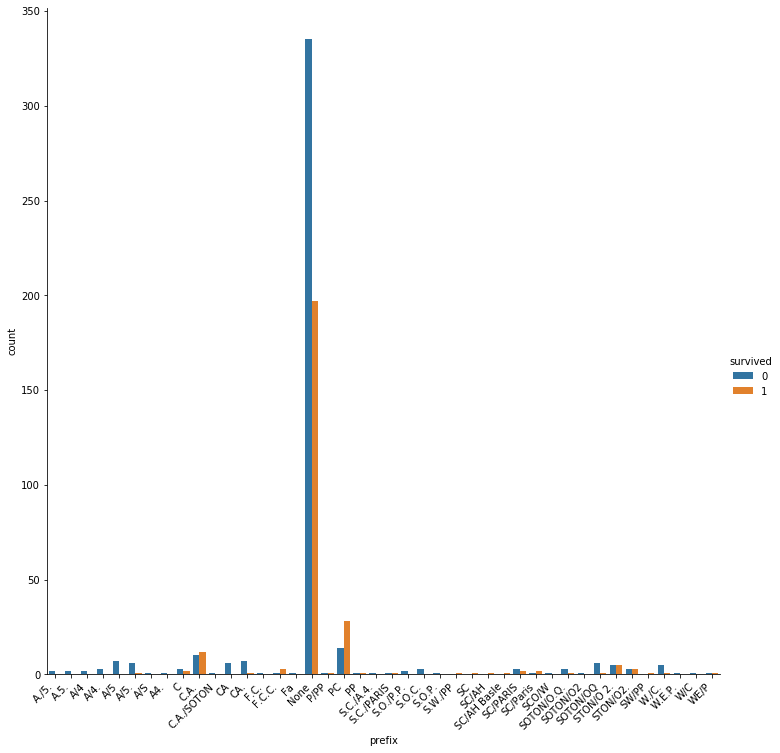

In [129]:
sns.catplot(x = 'prefix', hue='survived', data = ticket_df, kind="count", height=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
grouped_by_prefix = ticket_df.groupby("prefix")["survived"].value_counts()
grouped_by_prefix.name = "count"
grouped_by_prefix = grouped_by_prefix.reset_index("survived")
grouped_by_prefix= grouped_by_prefix.pivot(columns = "survived").fillna(0).astype(int)
grouped_by_prefix["total"] = grouped_by_prefix.sum(axis=1)
grouped_by_prefix.columns = ["death", "survived", "total"]

ci_df = pd.DataFrame(proportion_confint(
    grouped_by_prefix["survived"], grouped_by_prefix["total"], method="agresti_coull")).transpose()
ci_df.columns = ["lower_ci", 'upper_ci']
binom_ci_df = pd.concat([grouped_by_prefix, ci_df], axis = 1)

binom_ci_df["significative"] = ((binom_ci_df['lower_ci'] > 0.5) | (binom_ci_df['upper_ci'] < 0.5)).astype(int)

In [130]:
binom_ci_df.head()

,death,survived,total,lower_ci,upper_ci,significative
title,,,,,,
Capt,1,0,1,0.000000,0.832501,0
Col,1,1,2,0.094531,0.905469,0
Countess,0,1,1,0.167499,1.000000,0
Dr,3,2,5,0.115987,0.770910,0
Lady,0,1,1,0.167499,1.000000,0


I will group as one single pre_number all those pre_numbers that don't have a frequency statistically different than 0.5

In [131]:
levels_to_merge = binom_ci_df.index[binom_ci_df.significative == 0]

In [132]:
ticket_df.prefix = ticket_df.prefix.apply(
    lambda x: 'other' if x in levels_to_merge else x).astype('category')

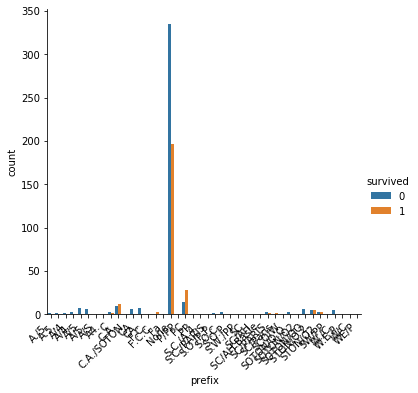

In [133]:
sns.catplot(x = 'prefix', hue='survived', data = ticket_df, kind="count", height=5)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
data[['ticket_num_log', 'ticket_prefix']] = ticket_df[["log", 'prefix']]

In [134]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title,deck,cabin_number,ticket_digit_1,ticket_digit_2,ticket_digit_3,ticket_digit_4,ticket_digit_5,ticket_digit_6,ticket_digit_7
331,332,0,1,"Partner, Mr. Austen",male,1.068522,0,0,113043,0.600041,...,Mr,C,-124,1,1,3,0,4,3,0
733,734,0,2,"Berriman, Mr. William John",male,-0.440383,0,0,28425,-0.104318,...,Mr,None,0,2,8,4,2,5,0,0
382,383,0,3,"Tikkanen, Mr. Juho",male,0.291367,0,0,STON/O 2. 3101293,-0.665852,...,Mr,None,0,3,1,0,1,2,9,3
704,705,0,3,"Hansen, Mr. Henrik Juul",male,-0.161281,1,0,350025,-0.877196,...,Mr,None,0,3,5,0,0,2,5,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,-1.482760,2,2,347082,0.705530,...,Miss,None,0,3,4,7,0,8,2,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,-0.353487,0,1,PC 17558,2.283460,...,Mr,B,59,1,7,5,5,8,0,0
536,537,0,1,"Butt, Major. Archibald Willingham",male,1.023003,0,0,113050,0.503497,...,other,B,-38,1,1,3,0,5,0,0
361,362,0,2,"del Carlo, Mr. Sebastiano",male,0.075345,1,0,SC/PARIS 2167,0.561327,...,Mr,None,0,2,1,6,7,0,0,0
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,-0.731515,...,Mr,None,0,3,4,9,2,1,6,0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,0.774833,...,Mr,C,-52,1,9,9,4,7,0,0


## Second round model

In [135]:
X = data.drop(["PassengerId", "Name", "Ticket"], axis=1).dropna()

y = X[["Survived"]]
X = X.drop("Survived", axis=1)

X = pd.get_dummies(X)

# Scaling dataframe
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [136]:
# testing several models
model_dict = {"naive_bayes": GaussianNB(),
              "logistic_regression": LogisticRegression(solver="lbfgs", max_iter=300),
              "decision_tree": tree.DecisionTreeClassifier(max_depth=4),
              "svm": svm.SVC(gamma='scale'),
              "random_forest": RandomForestClassifier(n_estimators=100),
              "neural_net": MLPClassifier(max_iter = 5000)}

f1_df, error_df_dict = fit_models(model_dict)

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A 

/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adri/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


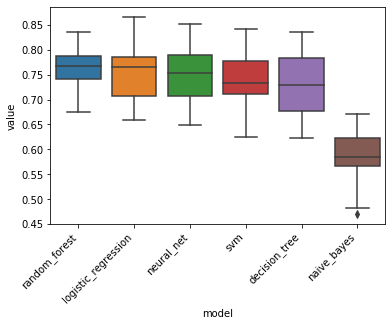

In [137]:
model_order = f1_df.groupby("model").mean().sort_values("value", ascending=False).index
sns.boxplot(y="value", x = "model", data = f1_df, order=model_order)
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
analyze_errors(error_df_dict, 2, 5)

In [ ]:
ls raw_data/*

## Test set prediction 

In [138]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

/home/adri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
X_test = pd.read_csv("raw_data/test.csv")
X_test.Sex = X_test.Sex.astype("category")
X_test.Age = quantile_age_transformer.transform(X_test[["Age"]])
X_test.SibSp = X_test.SibSp.apply(lambda x: 2 if x not in [0, 1] else x)
X_test.Parch = X_test.Parch.apply(lambda x: 2 if x not in [0, 1] else x)
X_test.Fare = fare_quantile_transformer.transform(X_test[["Fare"]])
X_test["boolean_cabin"] = X_test.Cabin.notna().astype(int)
X_test.boolean_cabin = X_test.boolean_cabin.astype("category")
X_test.Embarked = X_test.Embarked.astype("category")
X_test["title"] = X_test.Name.apply(lambda x: re.findall("(\w*)\.", x)[0]).astype("category")
X_test.title = X_test.title.apply(lambda x: 'other' if x in levels_to_merge else x).astype('category')



parsed_cabins = X_test.Cabin.fillna("").apply(lambda x: re.findall("(\w)(\d+)", x))

deck = []
cabin_number = []
for cabin_list in parsed_cabins:
    
    deck_list = set([cabin[0] for cabin in cabin_list])
    if deck_list:
        deck.append(list(deck_list)[0])
    else:
        deck.append("None")
        
    number_list = [int(cabin[1]) for cabin in cabin_list]
    
    if number_list:
        cabin_number.append(np.mean(number_list))
    else:
        cabin_number.append(0)
    
X_test = pd.concat([X_test, pd.DataFrame({"deck": deck,
                               "cabin_number": cabin_number},
                              index=X_test.index)], axis=1).drop(["Cabin", "boolean_cabin"], axis = 1)

X_test.deck = X_test.deck.astype("category")

X_test.cabin_number = X_test.cabin_number.apply(lambda x: -x if x%2 == 0 else x).astype(int)



# Extracting ticket number from ticket
ticket_number = X_test.Ticket.apply(lambda x: re.findall("(\d+)$", x))
ticket_number = ticket_number.apply(lambda x: int(x[0]) if x else 0).astype(int)

# Extracting prefix from ticket
ticket_prefix =  X_test.Ticket.apply(lambda x: re.findall("(.*)\s+.+$", x))
ticket_prefix = ticket_prefix.apply(lambda x: x[0] if x else "None").astype("category")

ticket_df = pd.DataFrame({'number': ticket_number, 
                        'prefix': ticket_prefix})

ticket_df['log'] = ticket_df.number.apply(lambda x: np.log(x) if x else 0)

ticket_digits = np.array([[int(digit) for digit in f'{num:<07d}'] for num in ticket_df.number])

digits_df = pd.DataFrame(ticket_digits, columns = [f"ticket_digit_{i}" for i in range(1,8)], index = X_test.index)
digits_df = digits_df.astype("category")


X_test = pd.concat([X_test, digits_df], axis = 1)


ticket_df.prefix = ticket_df.prefix.apply(
    lambda x: 'other' if x in levels_to_merge else x).astype('category')
X_test[['ticket_num_log', 'ticket_prefix']] = ticket_df[["log", 'prefix']]


X_test = X_test.drop(["PassengerId", "Name", "Ticket"], axis=1).dropna()


X_test = pd.get_dummies(X_test)

# Scaling DataFrame
x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled, columns=X_test.columns)

In [150]:
model.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 96 and input n_features is 130 

## Feature Engineering

### Name

In [ ]:
# Extracting the family name
data["family_name"] = data.Name.apply(lambda x: re.findall("(.*),", x)[0])

In [ ]:
# Extracting title
data["title"] = data.Name.apply(lambda x: re.findall("(\w*)\.", x)[0])

In [ ]:
# Extracting text between parenthesis
parenthesis = data.Name.apply(lambda x: re.findall("\((.*)\)", x))
data["parenthesis"] = parenthesis.apply(lambda x: x[0] if x else np.nan)

In [ ]:
# extracting the given name
given_name = data.Name.apply(lambda x: re.findall("\. (.+?)( \(|$)", x))
data["given_name"] = given_name.apply(lambda x: x[0][0] if x else np.nan)

In [ ]:
# cuotes
cuotes = data.Name.apply(lambda x: re.findall('\"(.*)\"', x))
data["cuotes"] = cuotes.apply(lambda x: x[0] if x else np.nan)